<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Exam_preparation/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Dataset

# Data preparation

## Download data

In [ ]:
#Download the file
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

--2021-09-14 07:53:21--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  53.02K  --.-KB/s    in 0.01s   

2021-09-14 07:53:21 (4.79 MB/s) - ‘insurance.csv’ saved [54288/54288]



In [ ]:
import pandas as pd

#Read in as pandas dataframe
insurance = pd.read_csv("/content/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## One hot encode data

In [ ]:
# Turn non-numerical columns into number
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#Get info about the dataframe
insurance_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [ ]:
x = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
x.shape, y.shape

((1338, 11), (1338,))

## Split data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Modelling experiments

In [ ]:
def plot_regression_training_curve(history):
  import matplotlib.pyplot as plt

  mae = history.history["mae"]
  val_mae = history.history["val_mae"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  mse = history.history["mse"]
  val_mse = history.history["val_mse"]
  
  plt.figure(figsize=(10,7))
  plt.plot(mae, label="mae")
  plt.plot(val_mae, label="val_mae")
  plt.legend()
  plt.title("mae")

  plt.figure(figsize=(10,7))
  plt.plot(mse, label="mse")
  plt.plot(val_mse, label="val_mse")
  plt.legend()
  plt.title("mse")

  plt.figure(figsize=(10,7))
  plt.plot(loss, label="loss")
  plt.plot(val_loss, label="val_loss")
  plt.legend()
  plt.title("Loss")

## Model 0: Dense

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# Build the model 
inputs = layers.Input(shape=(11,))
x = layers.Dense(1)(inputs)
outputs = layers.Dense(1)(x)
model_0 = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile the model 
model_0.compile(loss="mae", optimizer="Adam", metrics=["mae"])

In [ ]:
# Fit the model 
history_model_0 = model_0.fit(x_train, y_train, 
                              epochs=100, 
                              validation_data=(x_test, y_test))

In [ ]:
# Evaluate
model_0.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 11147.9863 - mae: 11147.9863


[11147.986328125, 11147.986328125]

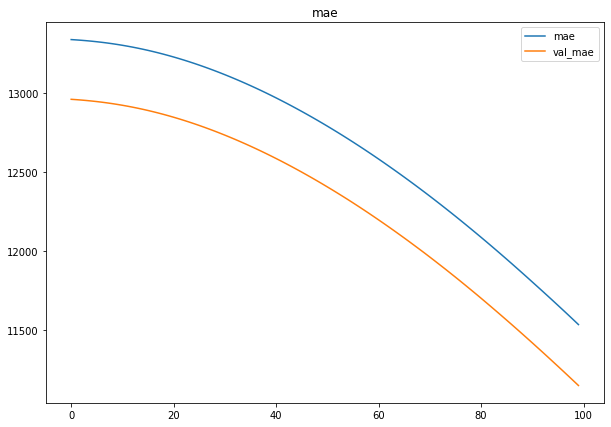

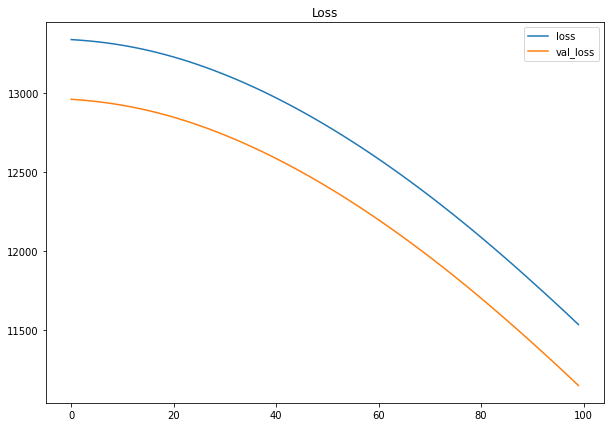

In [ ]:
plot_regression_training_curve(history_model_0)

## Model 1: Dense advanced

In [ ]:
tf.random.set_seed(42)

# Build the model 
inputs = layers.Input(shape=(11,))
x = layers.Dense(128)(inputs)
x = layers.Dense(64)(x)
x = layers.Dense(32)(x)
outputs = layers.Dense(1)(x)
model_1 = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile the model 
model_1.compile(loss="mae", optimizer="Adam", metrics=["mae"])

In [ ]:
# Fit the model 
history_model_1 = model_1.fit(x_train, y_train, 
                              epochs=500, 
                              validation_data=(x_test, y_test))

In [ ]:
#Evaluate
model_1.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.0967 - mae: 3170.0967


[3170.0966796875, 3170.0966796875]

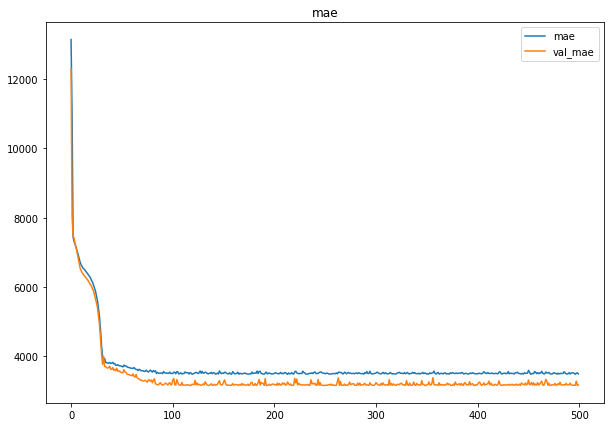

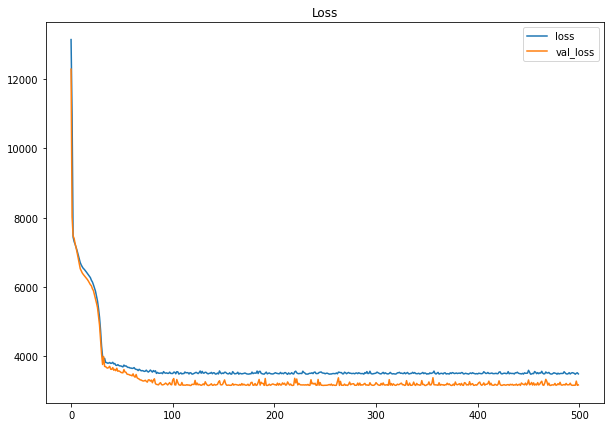

In [ ]:
plot_regression_training_curve(history_model_1)

## Normalize data

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Create column transformer for preprocessing our data
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [ ]:
#Create x and y
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [ ]:
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
#Fit column transformer
ct.fit(x_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

In [ ]:
#Transform train and test data
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [ ]:
x_train_normal.max(), x_train_normal.min()

(1.0, 0.0)

## Model 2: Dense advanced normalized

In [ ]:
tf.random.set_seed(42)

# Build the model 
inputs = layers.Input(shape=(11,))
x = layers.Dense(64)(inputs)
x = layers.Dense(64)(x)
#x = layers.Dense(32)(x)
outputs = layers.Dense(1)(x)
model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile the model 
model_2.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [ ]:
# Fit the model 
history_model_2 = model_2.fit(x_train_normal, y_train, 
                              epochs=500,
                              verbose=0,
                              validation_data=(x_test_normal, y_test),
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=0),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

In [ ]:
#Evaluate
model_2.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3159.4534 - mae: 3159.4534 - mse: 43080720.0000


[3159.453369140625, 3159.453369140625, 43080720.0]

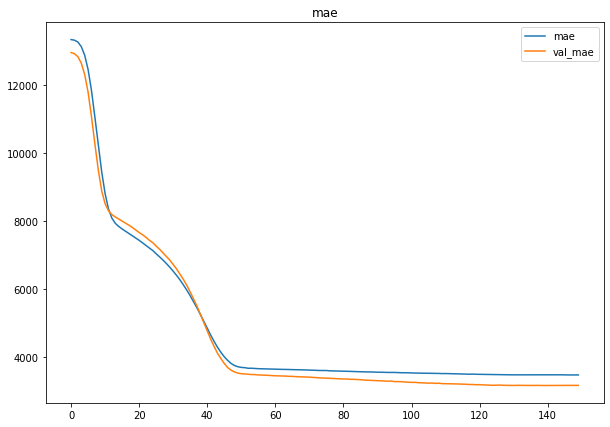

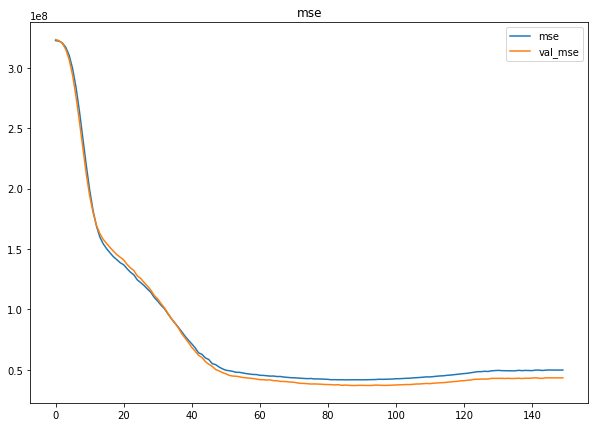

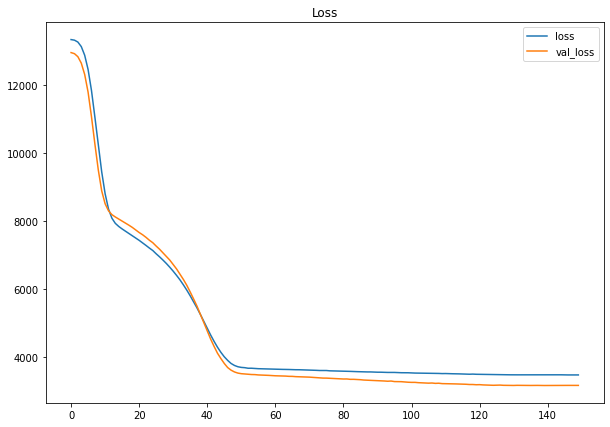

In [ ]:
plot_regression_training_curve(history_model_2)

## Model 3

In [ ]:
tf.random.set_seed(42)

# Build the model 
inputs = layers.Input(shape=(11,))
x = layers.Dense(12, activation="relu")(inputs)
x = layers.Dense(10, activation="relu")(x)
x = layers.Dense(8, activation="relu")(x)
x = layers.Dense(2, activation="relu")(x)
outputs = layers.Dense(1)(x)
model_3 = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile the model 
model_3.compile(loss="mae", optimizer="Adam", metrics=["mae", "mse"])

In [ ]:
# Fit the model 
history_model_3 = model_3.fit(x_train_normal, y_train, 
                              epochs=1000,
                              verbose=0,
                              validation_data=(x_test_normal, y_test),
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=0),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

In [ ]:
#Evaluate
model_3.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2859.2297 - mae: 2859.2297 - mse: 42714940.0000


[2859.229736328125, 2859.229736328125, 42714940.0]

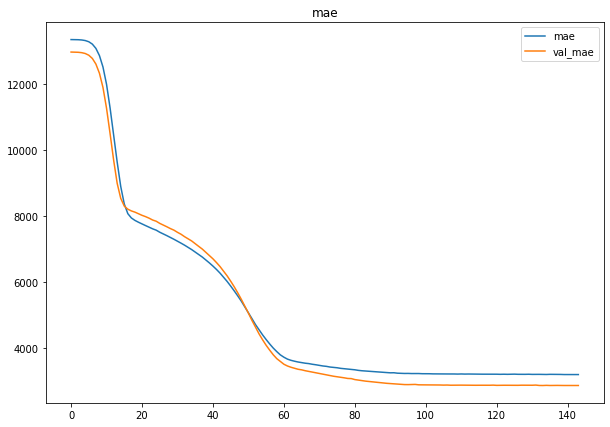

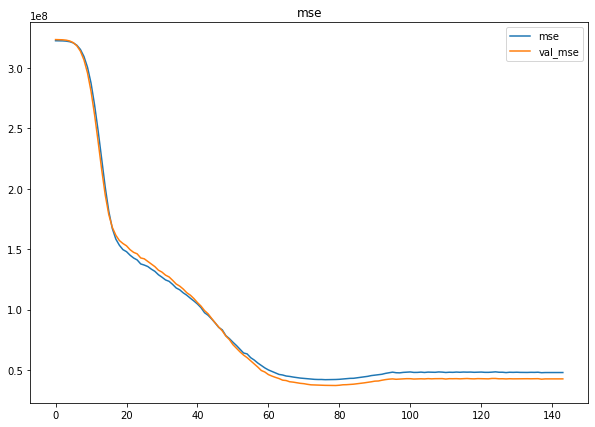

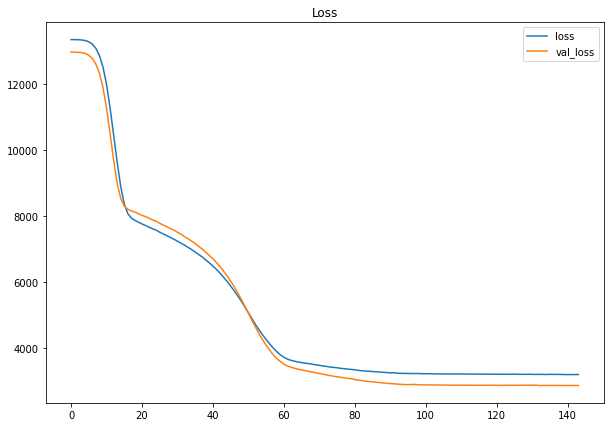

In [ ]:
plot_regression_training_curve(history_model_3)

# Boston Housing Dataset 

# Data preparation